Lab 4: Image Filtering in Frequency Domain

Question 1 : Display the power spectrum of ’alphabet.tif ’ and compute the amount of
power enclosed within radii of 10, 30, 60, 160, and 460 pixels with respect to
the full-size spectrum.

In [1]:
# uses numpy and mtplotlib libraries for the task
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# defines a function for padding the image
def padding(image)  :
    [h, w] = np.shape(image)
    padded = np.pad(image, ((h//2,h//2),(w//2, w//2)), mode = 'constant')
    [p, q] = np.shape(padded)
    return padded, p, q # return the padded image and its dimensions

In [3]:
# defines a function to compute  the power spectrum of the image
def power_spectrum(input) :
    dft = np.fft.fftshift(np.fft.fft2(input))
    power_spectrum = np.abs(dft)**2
    return power_spectrum

In [4]:
# reading the image file
alphabet = plt.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab4\alphabet.tif')
padded, p, q = padding(alphabet)      # finds the padded image
psd = power_spectrum(padded)          # finds the psd of the image
Pt = 0
for u  in range(p) :
    for v in range (q) :
        Pt = Pt + psd[u][v]           # finds the total power contained in the image
print(f"The toatal power of the image is {Pt}") 

The toatal power of the image is 4.3000270054199704e+16


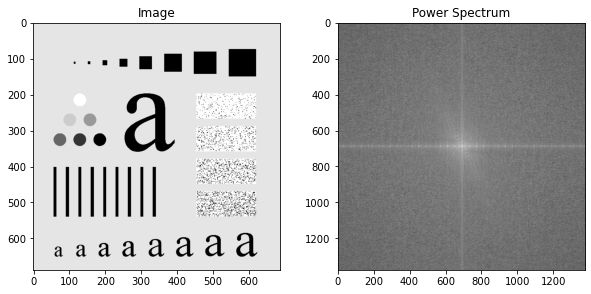

In [5]:
# ploting original image and its power spectrum
fig = plt.figure(figsize = (10, 10))
fig.add_subplot(2,2,1)
plt.imshow(alphabet, cmap ='gray')
plt.title('Image')
fig.add_subplot(2,2,2)
image_and_spectra = plt.imshow(np.log(psd), cmap='gray')
plt.title('Power Spectrum')
plt.show()

In [6]:
# calculating percentage power contained in circles of different radii
d0 = [10, 30, 60, 160, 460]    # defining radius values
for i in range(len(d0)) :
    pi = 0
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            if d <= d0[i]:
                pi = pi + psd[u][v]
    Pc = 100*pi/Pt     
    print(f"The Power Contained in a Circle of Radius {d0[i]} is {Pc}%")

The Power Contained in a Circle of Radius 10 is 86.99044510667065%
The Power Contained in a Circle of Radius 30 is 93.08230076141847%
The Power Contained in a Circle of Radius 60 is 95.66904358691824%
The Power Contained in a Circle of Radius 160 is 97.77493855071391%
The Power Contained in a Circle of Radius 460 is 99.18255695156142%


Question 2 : Perform following lowpass filtering(LPF) operations on ’alphabet.tif ’ with
cutoff frequencies set at radii values 10, 30, 60, 160, and 460:

(a) Ideal LPF

In [26]:
import numpy as np
import matplotlib.pyplot as plt
alphabet = plt.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab4\alphabet.tif')
#plt.imshow(alphabet, cmap ='gray')
[w, h] = np.shape(alphabet)
padded, p, q = padding(alphabet)
F = np.fft.fftshift(np.fft.fft2(padded))

In [27]:
# defines a function to compute the frequency response of an ideal low pass filter (H)
def ILPF_response(radius, p, q) :
    H_ILPF = np.ones(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            if d > radius :
                H_ILPF[u][v] = 0
    return H_ILPF

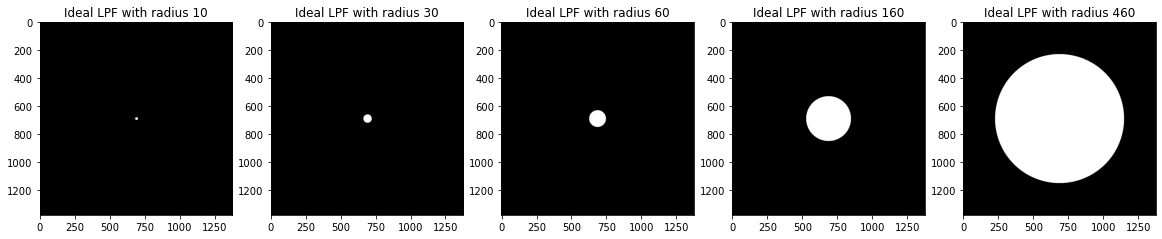

In [28]:
d0 = [10, 30, 60, 160, 460]
fig = plt.figure(figsize = (20, 10))
H_ILPF_dic = {i:{'radius': 0, 'transform': 0} for i in range(len(d0))}
for i in range(len(d0)) :
    H_ILPF_dic[i]['radius'] = d0[i]
    H_ILPF_dic[i]['transform'] = ILPF_response(d0[i], p, q)
    fig.add_subplot(1,5,i+1)
    plt.imshow(H_ILPF_dic[i]['transform'],cmap ='gray')
    plt.title(f'Ideal LPF with radius {d0[i]}')
    i += 1

In [47]:
def filtering_in_freq(input_transform, filter_chara, radius) :
    d0 = radius
    fig = plt.figure(figsize = (20, 10))
    F_filter_dic = {i:{'radius': 0, 'filtered_transform': 0} for i in range(len(d0))}
    for i in range(len(d0)) :
        F_filter_dic[i]['radius'] = d0[i]
        F_filter_dic[i]['filtered_transform'] = np.multiply(input_transform, filter_chara[i]['transform'])
        F_filter_dic[i]['filtered_transform'][F_filter_dic[i]['filtered_transform'] == 0] = 1
        fig.add_subplot(1,5,i+1)
        plt.imshow(np.log(np.abs(F_filter_dic[i]['filtered_transform'])), cmap='gray')
        plt.title(f'Filtered spectra with radius {d0[i]}')
        i += 1
    return F_filter_dic

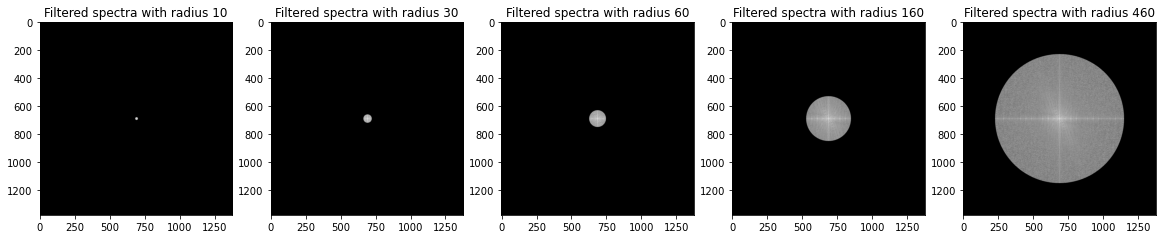

In [22]:
d0 = [10, 30, 60, 160, 460]
F_ilf_filter_dic = filtering_in_freq(F, H_ILPF_dic, d0)

In [8]:
# defines a function to compute the filtered image 
def filter(filtered_transform, radius) :
    f_filtered_dic = {i:{'radius': 0, 'filtered_image': 0} for i in range(len(radius))}
    for i in range(len(radius)) :
        #f_filtered_dic = {i:{'radius': 0, 'filtered_image': 0} for i in range(len(radius))}
        f_filtered_dic[i]['radius'] = radius[i]
        f_filtered_dic[i]['filtered_image'] = np.fft.ifft2(np.fft.ifftshift(filtered_transform))
    return f_filtered_dic
    

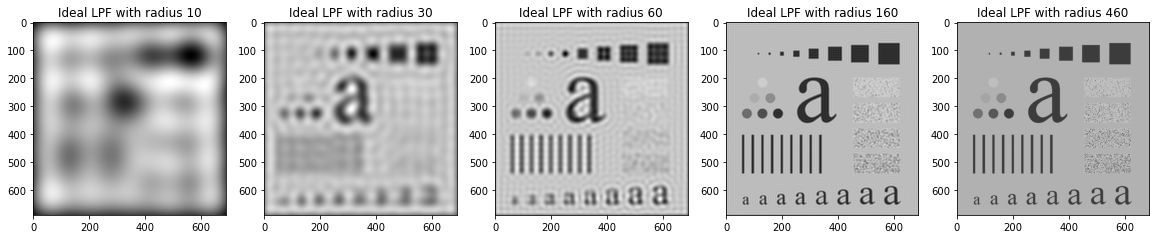

In [23]:
d0 = [10, 30, 60, 160, 460]
fig = plt.figure(figsize = (20, 10))
for i in range(len(d0)) :
    f_ilf_filtered_dic = filter(F_ilf_filter_dic[i]['filtered_transform'], d0)
    fig.add_subplot(1,5,i+1)
    plt.imshow(np.real(f_ilf_filtered_dic[i]['filtered_image'])[w//2 : w//2 + w, h//2 : h//2 + h],cmap ='gray')
    plt.title(f'Ideal LPF with radius {d0[i]}')
    i += 1

(b) Gaussian LPF

In [10]:
import numpy as np
import matplotlib.pyplot as plt
alphabet = plt.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab4\alphabet.tif')
#plt.imshow(alphabet, cmap ='gray')
padded, p, q = padding(alphabet)
F = np.fft.fftshift(np.fft.fft2(padded))

In [11]:
# defines a function to compute the frequency response of a Gaussian low pass filter (H)
def GLPF_response(radius,p,q) :
    H_GLPF = np.zeros(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            H_GLPF[u][v] = np.exp(-((d**2)/(2*radius**2)))
            v +=1
        u += 1      
    return H_GLPF


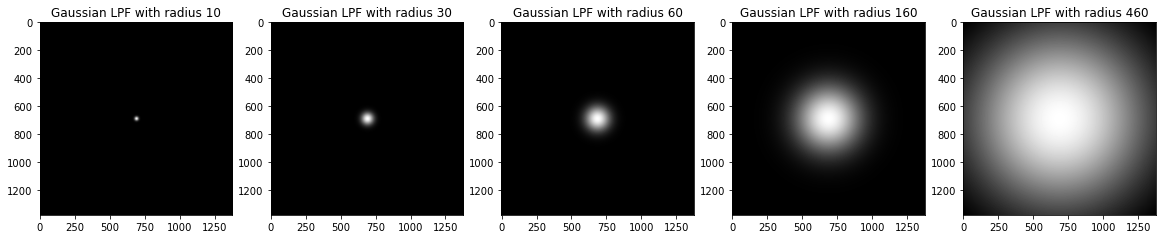

In [12]:
d0 = [10, 30, 60, 160, 460]
fig = plt.figure(figsize = (20, 10))
H_GLPF_dic = {i:{'radius': 0, 'transform': 0} for i in range(len(d0))}
for i in range(len(d0)) :
    H_GLPF_dic[i]['radius'] = d0[i]
    H_GLPF_dic[i]['transform'] = GLPF_response(d0[i], p, q)
    #H = ILPF_response(d0[i], p, q)
    fig.add_subplot(1,5,i+1)
    plt.imshow(H_GLPF_dic[i]['transform'],cmap ='gray')
    plt.title(f'Gaussian LPF with radius {d0[i]}')
    i += 1

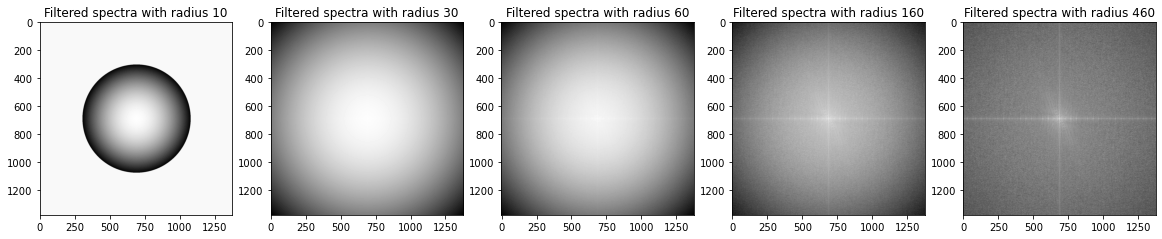

In [13]:
d0 = [10, 30, 60, 160, 460]
F_glf_filter_dic = filtering_in_freq(F, H_GLPF_dic, d0)

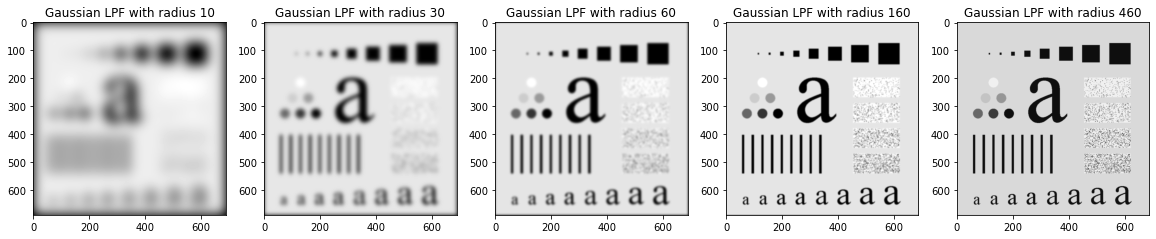

In [24]:
d0 = [10, 30, 60, 160, 460]
fig = plt.figure(figsize = (20, 10))
for i in range(len(d0)) :
    f_filtered_dic = filter(F_glf_filter_dic[i]['filtered_transform'], d0)
    fig.add_subplot(1,5,i+1)
    plt.imshow(np.real(f_filtered_dic[i]['filtered_image'])[w//2 : w//2 + w, h//2 : h//2 + h],cmap ='gray')
    plt.title(f'Gaussian LPF with radius {d0[i]}')
    i += 1

(c) Butterworth LPF(compare the effect of filter order)


In [15]:
# defines a function to compute the frequency response of a Butterworth low pass filter (H)
def BLPF_response(radius,p,q, order) :
    H_BLPF = np.zeros(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            H_BLPF[u][v] = 1/(1 + (d/radius)**(2*order))
            v += 1
        u += 1      
    return H_BLPF

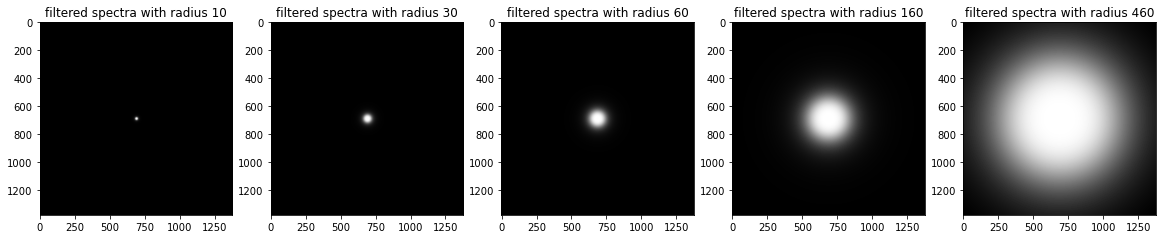

In [30]:
d0 = [10, 30, 60, 160, 460]
fig = plt.figure(figsize = (20, 10))
H_BLPF_dic = {i:{'radius': 0, 'transform': 0} for i in range(len(d0))}
order = 2
for i in range(len(d0)) :
    H_BLPF_dic[i]['radius'] = d0[i]
    H_BLPF_dic[i]['transform'] = BLPF_response(d0[i], p, q, order)
    #H = ILPF_response(d0[i], p, q)
    fig.add_subplot(1,5,i+1)
    plt.imshow(H_BLPF_dic[i]['transform'],cmap ='gray')
    plt.title(f'filtered spectra with radius {d0[i]}')
    i += 1

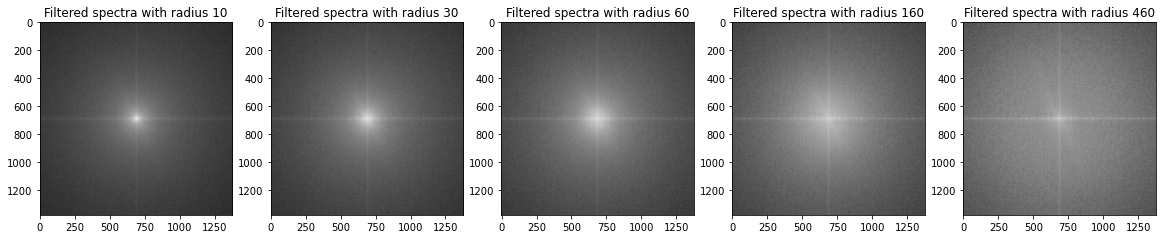

In [31]:
d0 = [10, 30, 60, 160, 460]
F_blpf_filter_dic = filtering_in_freq(F, H_BLPF_dic, d0)

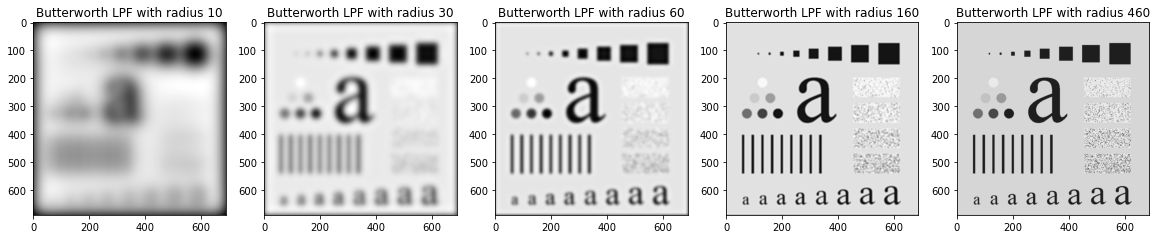

In [32]:
d0 = [10, 30, 60, 160, 460]
fig = plt.figure(figsize = (20, 10))
for i in range(len(d0)) :
    f_blpf_filtered_dic = filter(F_blpf_filter_dic[i]['filtered_transform'], d0)
    fig.add_subplot(1,5,i+1)
    plt.imshow(np.real(f_blpf_filtered_dic[i]['filtered_image'])[w//2 : w//2 + w, h//2 : h//2 + h],cmap ='gray')
    plt.title(f'Butterworth LPF with radius {d0[i]}')
    i += 1

Question 3 : Perform following highpass filtering(HPF) operations on ’alphabet.tif ’ using
cutoff frequency 60 and 160:


(a) Ideal HPF

In [33]:
# defines a function to compute the frequency response of an ideal high pass filter (H)
def IHPF_response(radius, p, q) :
    H_IHPF = np.ones(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            if d < radius :
                H_IHPF[u][v] = 0
    return H_IHPF

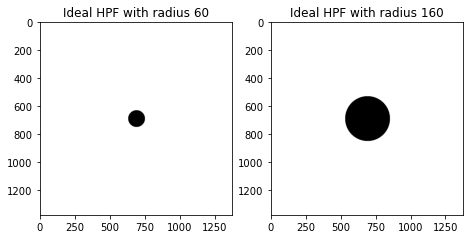

In [34]:
d0 = [60, 160]
fig = plt.figure(figsize = (20, 10))
H_IHPF_dic = {i:{'radius': 0, 'transform': 0} for i in range(len(d0))}
for i in range(len(d0)) :
    H_IHPF_dic[i]['radius'] = d0[i]
    H_IHPF_dic[i]['transform'] = IHPF_response(d0[i], p, q)
    fig.add_subplot(1,5,i+1)
    plt.imshow(H_IHPF_dic[i]['transform'],cmap ='gray')
    plt.title(f'Ideal HPF with radius {d0[i]}')
    i += 1

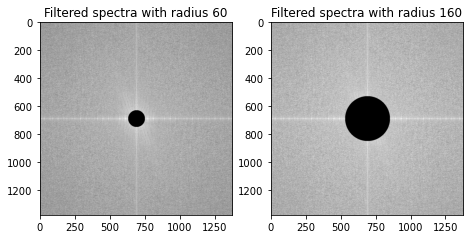

In [48]:
d0 = [60, 160]
F_ihpf_filter_dic = filtering_in_freq(F, H_IHPF_dic, d0)

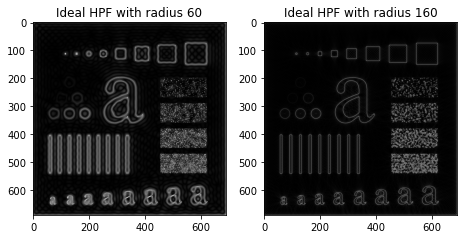

In [50]:
d0 = [60, 160]
fig = plt.figure(figsize = (20, 10))
for i in range(len(d0)) :
    f_ihpf_filtered_dic = filter(F_ihpf_filter_dic[i]['filtered_transform'], d0)
    fig.add_subplot(1,5,i+1)
    plt.imshow(abs(f_ihpf_filtered_dic[i]['filtered_image'])[w//2 : w//2 + w, h//2 : h//2 + h],cmap ='gray')
    plt.title(f'Ideal HPF with radius {d0[i]}')
    i += 1

(b) Gaussian HPF


In [40]:
# defines a function to compute the frequency response of a Gaussian high pass filter (H)
def GHPF_response(radius,p,q) :
    H_GHPF = np.zeros(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            H_GHPF[u][v] = 1 - np.exp(-((d**2)/(2*radius**2)))
            v +=1
        u += 1      
    return H_GHPF

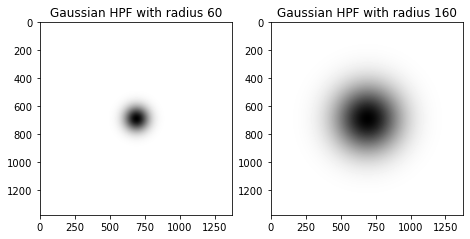

In [41]:
d0 = [60, 160]
fig = plt.figure(figsize = (20, 10))
H_GHPF_dic = {i:{'radius': 0, 'transform': 0} for i in range(len(d0))}
for i in range(len(d0)) :
    H_GHPF_dic[i]['radius'] = d0[i]
    H_GHPF_dic[i]['transform'] = GHPF_response(d0[i], p, q)
    fig.add_subplot(1,5,i+1)
    plt.imshow(H_GHPF_dic[i]['transform'],cmap ='gray')
    plt.title(f'Gaussian HPF with radius {d0[i]}')
    i += 1

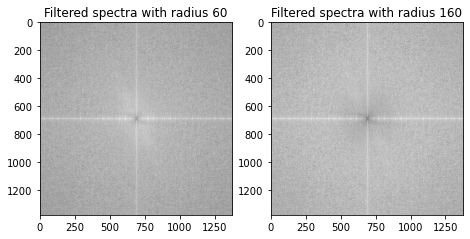

In [42]:
d0 = [60, 160]
F_ghpf_filter_dic = filtering_in_freq(F, H_GHPF_dic, d0)

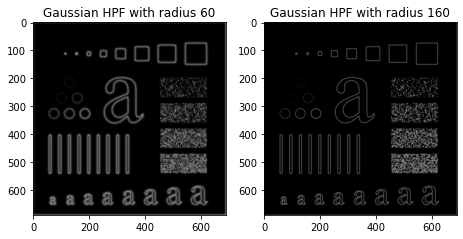

In [43]:
d0 = [60, 160]
fig = plt.figure(figsize = (20, 10))
for i in range(len(d0)) :
    f_ghpf_filtered_dic = filter(F_ghpf_filter_dic[i]['filtered_transform'], d0)
    fig.add_subplot(1,5,i+1)
    plt.imshow(abs(f_ghpf_filtered_dic[i]['filtered_image'])[w//2 : w//2 + w, h//2 : h//2 + h],cmap ='gray')
    plt.title(f'Gaussian HPF with radius {d0[i]}')
    i += 1

(c) Butterworth HPF(compare the effect of filter order)

In [52]:
# defines a function to compute the frequency response of a Butterworth high pass filter (H)
def BHPF_response(radius,p,q, order) :
    H_BHPF = np.zeros(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            H_BHPF[u][v] = 1 - (1/(1 + (d/radius)**(2*order)))
            v += 1
        u += 1      
    return H_BHPF

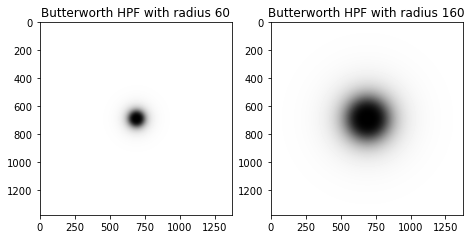

In [53]:
d0 = [60, 160]
fig = plt.figure(figsize = (20, 10))
H_BHPF_dic = {i:{'radius': 0, 'transform': 0} for i in range(len(d0))}
order = 2
for i in range(len(d0)) :
    H_BHPF_dic[i]['radius'] = d0[i]
    H_BHPF_dic[i]['transform'] = BHPF_response(d0[i], p, q, order)
    fig.add_subplot(1,5,i+1)
    plt.imshow(H_BHPF_dic[i]['transform'],cmap ='gray')
    plt.title(f'Butterworth HPF with radius {d0[i]}')
    i += 1

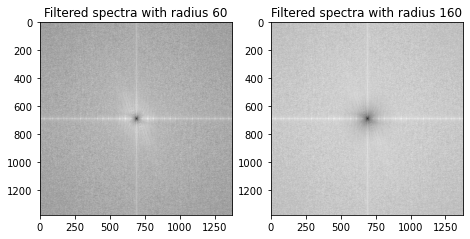

In [54]:
d0 = [60, 160]
F_bhpf_filter_dic = filtering_in_freq(F, H_BHPF_dic, d0)

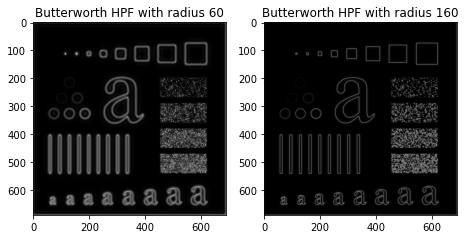

In [55]:
d0 = [60, 160]
fig = plt.figure(figsize = (20, 10))
for i in range(len(d0)) :
    f_bhpf_filtered_dic = filter(F_bhpf_filter_dic[i]['filtered_transform'], d0)
    fig.add_subplot(1,5,i+1)
    plt.imshow(abs(f_bhpf_filtered_dic[i]['filtered_image'])[w//2 : w//2 + w, h//2 : h//2 + h],cmap ='gray')
    plt.title(f'Butterworth HPF with radius {d0[i]}')
    i += 1

Question 4 : Perform image enhancement on ’moon.tif ’ using Laplacian in the frequency
domain.

In [2]:
# uses numpy and mtplotlib libraries for the task
import numpy as np
import matplotlib.pyplot as plt

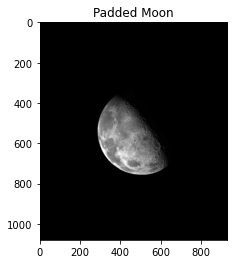

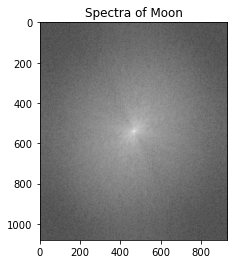

In [32]:
moon = plt.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab4\moon.tif')
[h, w] = np.shape(moon)
padded, p, q = padding(moon)# uses numpy and mtplotlib libraries for the task
import numpy as np
import matplotlib.pyplot as plt
padded = padded/np.max(padded)
plt.imshow(padded, cmap = 'gray')
plt.title("Padded Moon")
plt.show()
F = np.fft.fftshift(np.fft.fft2(padded))
plt.imshow(np.log(abs(F)), cmap ='gray')
plt.title("Spectra of Moon")
plt.show()

In [38]:
print(np.max(padded), np.min(padded))

1.0 0.0


In [39]:
def laplacian(input, p, q) :
    H = np.zeros([p, q])
    for u in range(p) :
        for v in range(q) :
            H[u][v] = -4*(np.pi**2)*((u - p//2)**2 + (v - q//2)**2)  
    Fl = np.multiply(input, H)
    return Fl, H

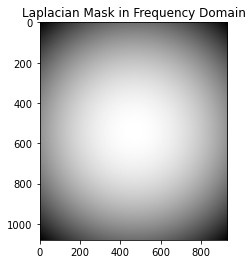

<ipython-input-40-7985c8069767>:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(Fl)), cmap = 'gray')


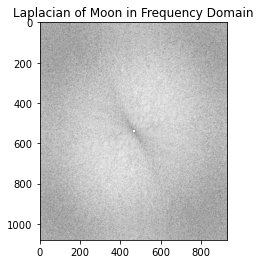

In [40]:
Fl, H = laplacian(F, p, q)
Fl[abs(Fl == 0)] == 1
plt.imshow(H, cmap = 'gray')
plt.title("Laplacian Mask in Frequency Domain")
plt.show()
#plt.imshow(np.log(abs(Fl)), cmap = 'gray')
#plt.title("Laplacian of Moon in Frequency Domain")
#plt.show()


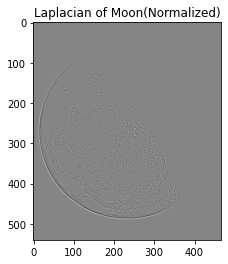

In [42]:
del2_f = np.fft.ifft2(np.fft.ifftshift(Fl))
del2_f = del2_f/np.max(del2_f)
plt.imshow(np.real(del2_f)[h//2 : h//2 + h, h//2 : h//2 + w], cmap = 'gray')
plt.title("Laplacian of Moon(Normalized)")
plt.show()

In [49]:
print(np.min(np.real(del2_f)))
print(np.max(np.real(del2_f)))

-1.081993488301791
0.9999999999999999


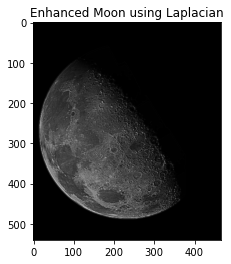

In [45]:
c = -1
g = padded + c*del2_f
plt.imshow(abs(g)[h//2 : h//2 + h, h//2 : h//2 + w], cmap = 'gray')
plt.title("Enhanced Moon using Laplacian")
plt.show()

Question 5 : Perform the following image enhancement operations on ’chest.tif ’.

In [1]:
# uses numpy and mtplotlib libraries for the task
import numpy as np
import matplotlib.pyplot as plt

In [4]:
chest = plt.imread(r'C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab4\chest.tif')
[h, w] = np.shape(chest)
padded, p, q = padding(chest)
F = np.fft.fftshift(np.fft.fft2(padded))

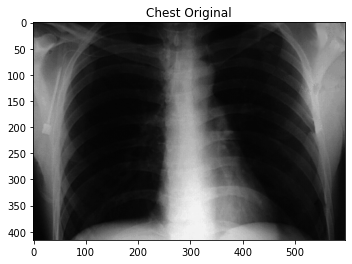

In [5]:
plt.imshow(chest, cmap = 'gray')
plt.title("Chest Original")
plt.show()

In [6]:
# defines a function to compute the frequency response of a Gaussian high pass filter (H)
def GHPF_response(radius,p,q) :
    H_GHPF = np.zeros(p*q).reshape(p, q)
    for u in range(p) :
        for v in range(q) :
            d = np.sqrt((u - p//2)**2 + (v - q//2)**2)
            H_GHPF[u][v] = 1 - np.exp(-((d**2)/(2*radius**2)))
            v +=1
        u += 1      
    return H_GHPF

In [7]:
d0 = 60
H = GHPF_response(d0, p, q)

In [8]:
# defines a function to compute the enhanced image
def img_enhance(F, H, k) :
    g = np.fft.ifft2(np.fft.ifftshift(np.multiply((1 + k*H), F)))
    return g

In [9]:
k = [1, 2, 5]

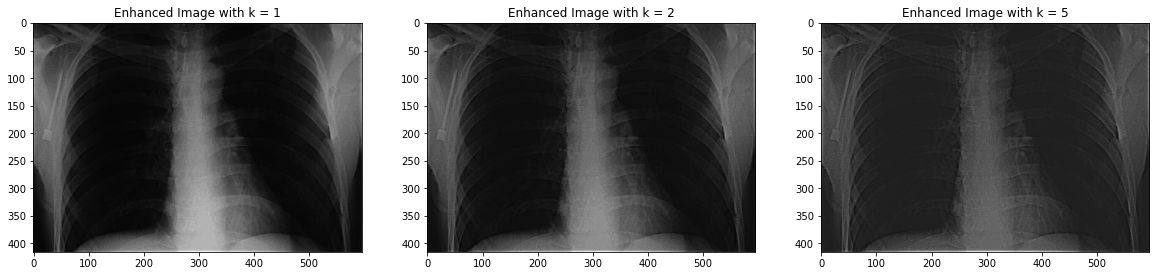

In [11]:
fig = plt.figure(figsize = (20, 10))
for i in range(len(k)) :
    enhanced = img_enhance(F, H, k[i])
    fig.add_subplot(1,3,i+1)
    plt.imshow(np.real(enhanced)[h//2 : h//2 + h, w//2 : w//2 + w],cmap ='gray')
    plt.title(f'Enhanced Image with k = {k[i]}')
    i += 1